In [4]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage.io import imread, imshow
from skimage.measure import label, regionprops
from skimage.morphology import binary_closing, binary_opening, disk
from skimage.filters import threshold_otsu
from skimage.transform import rescale
from skimage import draw


Pretty printing has been turned OFF


## Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore, read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

/home/masters/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


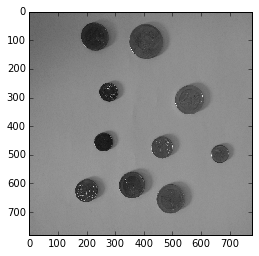

In [5]:
# Image in skimage
from skimage import io

filecoins = './images/coins.jpg'
im_coins = io.imread(filecoins, as_grey = True)

#Image as ubyte
u_coins  = img_as_ubyte(im_coins)

#Scaling the image
u_coins = rescale (u_coins, 0.25)

#Displaying the image
io.imshow(u_coins)


Subsquently, threshold the image using a global Otsu's thresholding after converting the image into gray scale. Display the image.

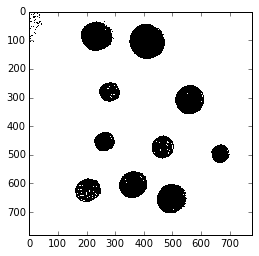

In [6]:
threshold_global_otsu =  threshold_otsu(u_coins)
coin_otsu = u_coins >= threshold_global_otsu
io.imshow(coin_otsu)



Clean the image using some morphological operations, i.e. erosion, dilation, opening, closing ...

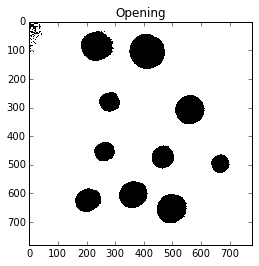

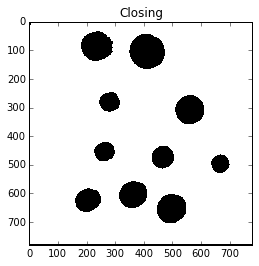

In [7]:
from scipy import ndimage

# Applying opening
# Opening erodes and then dilates. It removes objects smaller than the structuring element. 
coin_op = ndimage.binary_opening(coin_otsu, disk(2))
plt.figure()
plt.title('Opening')
io.imshow (coin_op)


# Applying Closing
# Closing fills holes smaller than the structuring element.
coin_close = ndimage.binary_closing(coin_op, disk(5))
plt.figure()
plt.title('Closing')
io.imshow (coin_close)


# Applying dilation
# Dilation expands the shapes in an image.
#coin_dil = ndimage.binary_dilation(coin_otsu, disk(2))
#plt.figure()
#plt.title('Dilation')
#io.imshow (coin_dil)



Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image.

12
The radius of region

/home/masters/anaconda3/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:71: UserWarning: Non-standard image type; displaying image with stretched contrast.
  warnings.warn("Non-standard image type; displaying image with "
/home/masters/anaconda3/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warnings.warn("Low image dynamic range; displaying image with "
/home/masters/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


 0 is:  409.4889396591981
The radius of region 1 is:  53.31218410208934
The radius of region 2 is:  61.56391649976791
The radius of region 3 is:  35.11598637481233
The radius of region 4 is:  50.78959851813597
The radius of region 5 is:  34.72402408800281
The radius of region 6 is:  39.20610208094558
The radius of region 7 is:  31.975167777860612
The radius of region 8 is:  48.19117066016281
The radius of region 9 is:  42.67750190373905
The radius of region 10 is:  51.62257613806866


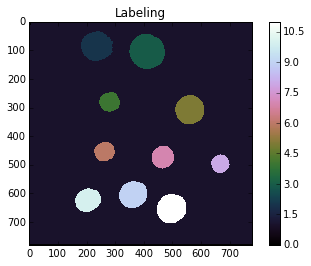

In [8]:
from skimage.measure import label, regionprops

# 1. Showing the image with different labels
label_coins, n = label(coin_close, return_num =True)


# 2. Showing the number of regions. In this case, we have 12 regions.
print(n)
plt.figure()
plt.title('Labeling')
io.imshow (label_coins)


# 3. Displaying the radius of each region 
props_coins = regionprops(label_coins)
for i in range(len(props_coins)):
    radius = ( props_coins[i].equivalent_diameter / 2 )
    print ('The radius of region', i, 'is: ', radius) 


## Segmentation of markers

Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

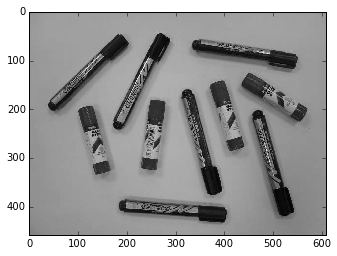

In [9]:
im_objets = rgb2gray(img_as_ubyte(imread("images/objets4.jpg")))

imshow(im_objets)

NameError: name 'square' is not defined

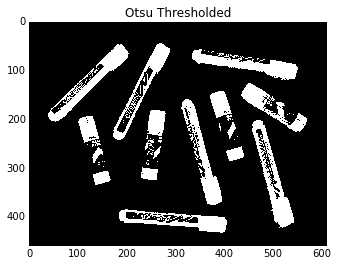

In [10]:
im_objets_thresh = im_objets < threshold_otsu(im_objets)

plt.figure(figsize=(8,4))
plt.title("Otsu Thresholded")
imshow(im_objets_thresh)

#Remove noise
im_objets_opened = binary_opening(im_objets_thresh, square(2))

#Fill holes and merge shapes
im_objets_morph = binary_closing(im_objets_opened, disk(8))

plt.figure(figsize=(8,4))
plt.title("Morphologically Processed")
imshow(im_objets_morph)

In [11]:
im_objets_labels = label(im_objets_morph)
im_objets_props = regionprops(im_objets_labels)

num_pens_found = 0
num_glue_found = 0

for label_prop in im_objets_props:
    #Rule out smaller objects and not correctly joined parts by area
    if(label_prop["area"] > 1000): 
        if(label_prop["eccentricity"] > 0.98): #Pens have a big eccentricity of around 0.99+
            num_pens_found += 1
        else: #Other objects are considered to be glue
            num_glue_found += 1

print("Number of pens = " + str(num_pens_found))
print("Number of glue = "+ str(num_glue_found))

NameError: name 'im_objets_morph' is not defined